# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"

    city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | grytviken
City not found. Skipping...
Processing Record 2 of Set 1 | siwa oasis
Processing Record 3 of Set 1 | arraial do cabo
City not found. Skipping...
Processing Record 4 of Set 1 | kapa'a
City not found. Skipping...
Processing Record 5 of Set 1 | chegdomyn
Processing Record 6 of Set 1 | bulalacao
Processing Record 7 of Set 1 | tolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 10 of Set 1 | vilyuchinsk
City not found. Skipping...
Processing Record 11 of Set 1 | college
City not found. Skipping...
Processing Record 12 of Set 1 | kenai
Processing Record 13 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 14 of Set 1 | bilibino
City not found. Skipping...
Processing Record 15 of Set 1 | fiche
Processing Record 16 of Set 1 | waitangi
City not found. Skipping...
Processing Record 17 of Set 

In [5]:
print(city_data)

[{'City': 'siwa oasis', 'Lat': 28.2164, 'Lng': 25.6721, 'Max Temp': 289.44, 'Humidity': 47, 'Cloudiness': 0, 'Wind Speed': 3.37, 'Country': 'EG', 'Date': 1701879125}, {'City': 'chegdomyn', 'Lat': 54.4633, 'Lng': 133.3958, 'Max Temp': 259.94, 'Humidity': 91, 'Cloudiness': 100, 'Wind Speed': 3.54, 'Country': 'RU', 'Date': 1701879127}, {'City': 'bulalacao', 'Lat': 12.3763, 'Lng': 121.4559, 'Max Temp': 299.8, 'Humidity': 83, 'Cloudiness': 70, 'Wind Speed': 4.84, 'Country': 'PH', 'Date': 1701879128}, {'City': 'kenai', 'Lat': 63.6521, 'Lng': -155.2821, 'Max Temp': 252.49, 'Humidity': 100, 'Cloudiness': 95, 'Wind Speed': 1.55, 'Country': 'US', 'Date': 1701879131}, {'City': 'fiche', 'Lat': 10.1319, 'Lng': 38.8709, 'Max Temp': 297.47, 'Humidity': 33, 'Cloudiness': 68, 'Wind Speed': 1.04, 'Country': 'ET', 'Date': 1701879133}, {'City': 'markovo', 'Lat': 56.844, 'Lng': 107.2006, 'Max Temp': 232.96, 'Humidity': 100, 'Cloudiness': 71, 'Wind Speed': 0.81, 'Country': 'RU', 'Date': 1701879135}, {'City'

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          155
Lat           155
Lng           155
Max Temp      155
Humidity      155
Cloudiness    155
Wind Speed    155
Country       155
Date          155
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,siwa oasis,28.2164,25.6721,289.44,47,0,3.37,EG,1701879125
1,chegdomyn,54.4633,133.3958,259.94,91,100,3.54,RU,1701879127
2,bulalacao,12.3763,121.4559,299.80,83,70,4.84,PH,1701879128
3,kenai,63.6521,-155.2821,252.49,100,95,1.55,US,1701879131
4,fiche,10.1319,38.8709,297.47,33,68,1.04,ET,1701879133


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siwa oasis,28.2164,25.6721,289.44,47,0,3.37,EG,1701879125
1,chegdomyn,54.4633,133.3958,259.94,91,100,3.54,RU,1701879127
2,bulalacao,12.3763,121.4559,299.80,83,70,4.84,PH,1701879128
3,kenai,63.6521,-155.2821,252.49,100,95,1.55,US,1701879131
4,fiche,10.1319,38.8709,297.47,33,68,1.04,ET,1701879133


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

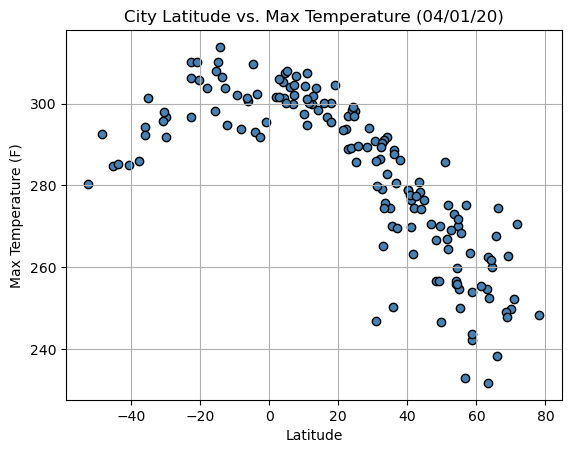

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],[city_data_df["Max Temp"]], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

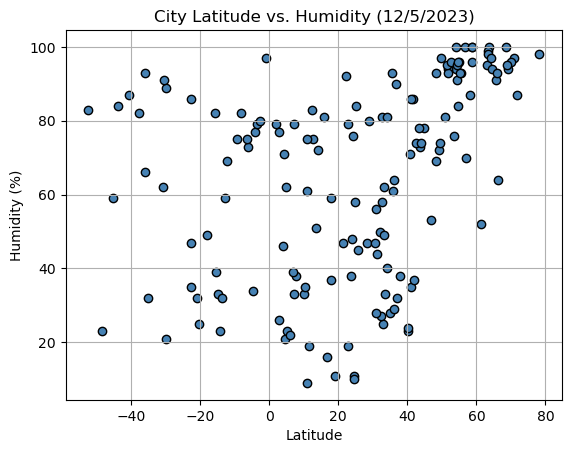

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],[city_data_df["Humidity"]], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (12/5/2023)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

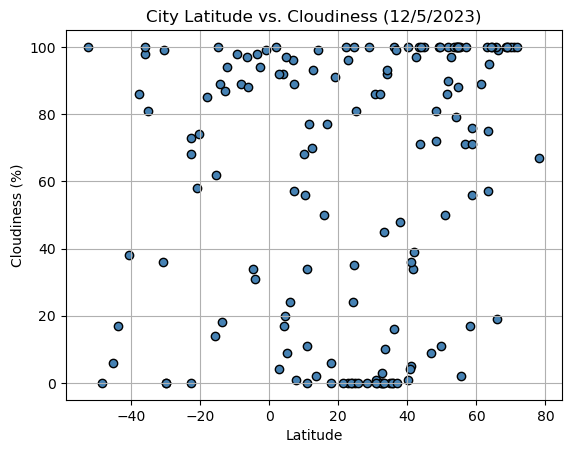

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],[city_data_df["Cloudiness"]], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (12/5/2023)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

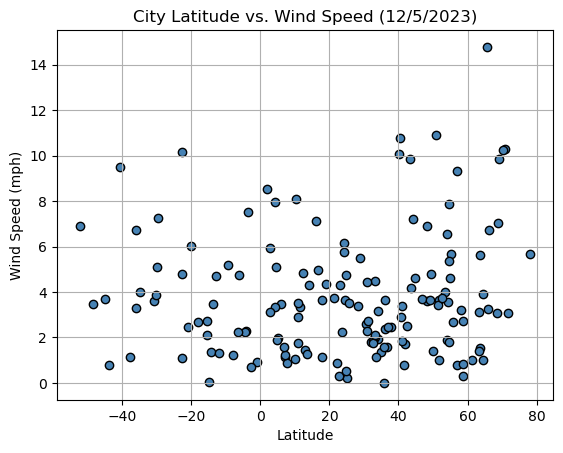

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],[city_data_df["Wind Speed"]], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (12/5/2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
def plot_linear_regression(x, y, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    regression_line = slope * np.array(x) + intercept
    plt.scatter(x,y, label='Data Points')
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.legend()

    equation = f"y = {slope:2f}x + {intercept:2f}\nR-squared = {r_value**2:2f}"
    plt.annotate(equation, xy=(0.1,0.9), xycoords='axes fraction', fontsize=10, color='red')
    plt.show()

In [ ]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line
    regression_line = slope * np.array(x_values) + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolors='black', label='Data Points')

    # Plot regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add grid lines
    plt.grid()

    # Add legend
    plt.legend()

    # Display regression equation and correlation coefficient in the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
    plt.annotate(equation, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10, color='blue')

    # Save the figure
    plt.savefig("../output_data/linear_regression_plot.png")
    # Show the plot
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siwa oasis,28.2164,25.6721,289.44,47,0,3.37,EG,1701879125
1,chegdomyn,54.4633,133.3958,259.94,91,100,3.54,RU,1701879127
2,bulalacao,12.3763,121.4559,299.80,83,70,4.84,PH,1701879128
3,kenai,63.6521,-155.2821,252.49,100,95,1.55,US,1701879131
4,fiche,10.1319,38.8709,297.47,33,68,1.04,ET,1701879133


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
9,kiomboi,-52.3890,-72.5708,280.30,83,100,6.90,CL,1701879146
10,minas de marcona,-4.2708,34.4471,292.99,77,31,2.30,TZ,1701879148
12,bechar,-14.3740,-51.7650,313.85,23,89,1.37,BR,1701879151
15,abu jibeha,-14.8682,-56.4303,310.10,33,100,0.03,BR,1701879157
18,rawson,-29.8450,-70.7365,296.72,21,0,5.08,CL,1701879163


###  Temperature vs. Latitude Linear Regression Plot

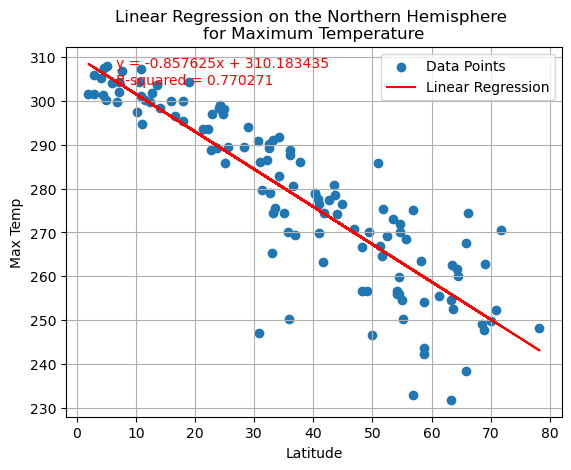

In [20]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature")
plt.show()

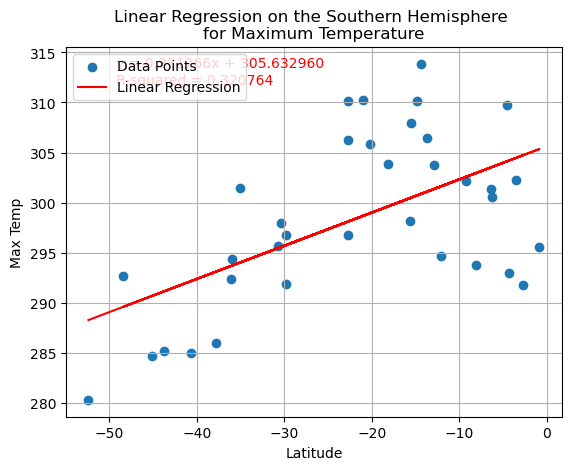

In [21]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature")
plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, as we move north, the temperature decreases. This is an observable relationship
In the southern hempisher, as we move south, the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

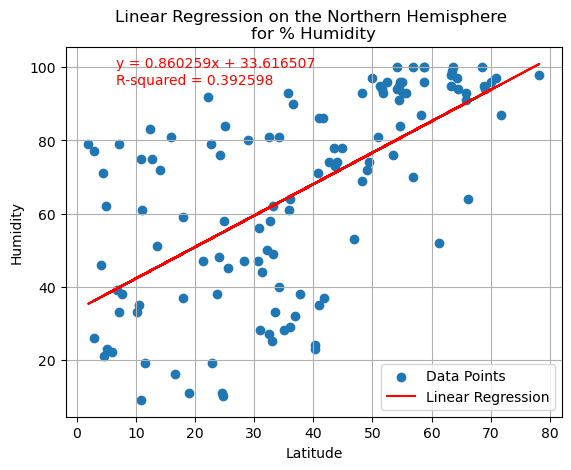

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Linear Regression on the Northern Hemisphere \nfor % Humidity")
plt.show()

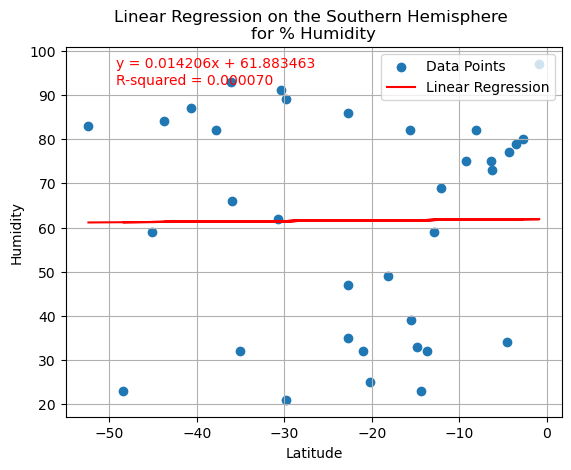

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Linear Regression on the Southern Hemisphere \nfor % Humidity")
plt.show()  

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE